## DATA DIRI
2. Nama = DAFFA RAYHAN RIADI
3. Username = daffarayhanriadi
4. Email = daffarayhanriadi@gmail.com 
5. No. Telepon = +6285277116302
6. Kota Domisili = Purwokerto
7. Tempat Lahir = Kota Padangsidempuan - Sumatera Utara
8. Tanggal Lahir = 03 Oktober 2022
9. Jenis Kelamin = Laki-laki
10. Pendidikan Terakhir = SMA
11. Pekerjaan/Profesi saat ini = Pelajar/Mahasiswa
12. Perusahaan/Institusi saat ini = Institut Teknologi Telkom Purwokerto

## *Import Library*
Melakukan import beberapa library yang diperlukan

In [1]:
import pandas as pd # Untuk membaca file csv dari dataset
import numpy as np # Untuk mengubah data menjadi bentuk array
import matplotlib.pyplot as plt # Untuk visualisasi data
import tensorflow as tf
import keras

from tensorflow.keras import layers 
from sklearn.model_selection import train_test_split # Untuk membagi data latih dan data test
from sklearn.preprocessing import MinMaxScaler # Untuk melakukan normalisasi data

## *Data Loading*
Melakukan Data *Loading* dengan [*Dataset*](https://www.kaggle.com/datasets/arashnic/book-recommendation-dataset) berikut ini.

In [2]:
data_buku = pd.read_csv('https://raw.githubusercontent.com/Daffarr/Book-Recomendation/main/Dataset/Books.csv')
data_rating = pd.read_csv('https://raw.githubusercontent.com/Daffarr/Book-Recomendation/main/Dataset/Ratings.csv')

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
data_buku.head(3)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...


In [4]:
data_rating.head(3)

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0


## Data *Understanding*

Variabel-variabel pada *dataset* adalah sebagai berikut: 

*Books.csv*
* ***ISBN***: `Kode pengidentifikasian buku yang bersifat unik.`
* ***Book-Title***: `Judul Buku.`
* ***Book-Author***: `Nama pengarang buku.`
* ***Year-Of-Publication***: `Tahun penerbitan buku.`
* ***Publisher***: `Pihak penerbit buku.`
* ***Image-URL-S***: `URL yang menautkan ke gambar sampul berukuran kecil.`
* ***Image-URL-M***: `URL yang menautkan ke gambar sampul berukuran normal.`
* ***Image-URL-L***: `URL yang menautkan ke gambar sampul berukuran besar.`

*Rating.csv*
* ***User-ID***: `Nomer unik user yang memberikan rating.`
* ***ISBN***: `Kode pengidentifikasian buku yang bersifat unik.`
* ***Book-Rating***: `Skor dari rating yang diberikan.`

### Menghitung Shape Buku dan *Rating*

In [5]:
print("Shape dari data buku:" , data_buku.shape)
print("Shape dari data rating:" , data_rating.shape)

Shape dari data buku: (271360, 8)
Shape dari data rating: (1149780, 3)


### Menghitung Jumlah Total Buku, User dan *Rating*

In [6]:
print('Total Jumlah data buku: ', len(data_buku['ISBN'].unique()))
print('Total Jumlah data user yang memberikan rating: ', len(data_rating['User-ID'].unique()))
print('Total Jumlah data rating pada buku: ', len(data_rating['ISBN'].unique()))

Total Jumlah data buku:  271360
Total Jumlah data user yang memberikan rating:  105283
Total Jumlah data rating pada buku:  340556


### Memeriksan Informasi Pada Data

In [7]:
data_buku.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271359 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


Terlihat dari data buku di atas. Semua kolom data memiliki *type* data *object*, namun disini dapat kita lihat juga bahwa ***Year-Of-Publication*** seharusnya bertipe data *number*, namun karena kita disini tidak menggunakan fitur tersebut pada proyek kali ini, sehingga tidak apa-apa

In [8]:
daftar_judul_buku = data_buku['Book-Title'].value_counts().keys()
total_jumlah = data_buku['Book-Title'].value_counts()

jumlah_buku = pd.DataFrame({'Judul-Buku': daftar_judul_buku, 'Total-Jumlah-Buku': total_jumlah}).reset_index(drop=True)
jumlah_buku

,Judul-Buku,Total-Jumlah-Buku
0,Selected Poems,27
1,Little Women,24
2,Wuthering Heights,21
3,The Secret Garden,20
4,Dracula,20
...,...,...
242130,What Every Kid Should Know,1
242131,The Seventh Enemy (A Brady Coyne Mystery),1
242132,A Brace of Skeet,1
242133,"The Yellow Admiral (O'Brian, Patrick, Aubrey/M...",1


In [9]:
daftar_penulis = data_buku['Book-Author'].value_counts().keys()
total_jumlah_penulis = data_buku['Book-Author'].value_counts()

jumlah_penulis = pd.DataFrame({'Nama-Penulis-Buku': daftar_penulis, 'Total-Jumlah-Penulis': total_jumlah_penulis}).reset_index(drop=True)
jumlah_penulis

,Nama-Penulis-Buku,Total-Jumlah-Penulis
0,Agatha Christie,632
1,William Shakespeare,567
2,Stephen King,524
3,Ann M. Martin,423
4,Carolyn Keene,373
...,...,...
102018,Linda Jackson,1
102019,Artiste C. Arthur,1
102020,Emily Pearl Kingsley,1
102021,Jean Cassels,1


In [10]:
data_rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


Untuk data rating sendiri dapat dilihat diatas terdapat 2 tipe pada data yaitu numerik (*int64*) dan *object*.

In [11]:
daftar_rating = data_rating['Book-Rating'].value_counts().keys()
jumlah = data_rating['Book-Rating'].value_counts()

jumlah_rating = pd.DataFrame({'Ratings': daftar_rating, 'Total-Jumlah-Rating': jumlah}).reset_index(drop=True)
jumlah_rating

,Ratings,Total-Jumlah-Rating
0,0,716109
1,8,103736
2,10,78610
3,7,76457
4,9,67541
5,5,50974
6,6,36924
7,4,8904
8,3,5996
9,2,2759


### Memeriksan *Missing Value*

In [12]:
print("Setiap nilai nol di data Books:")
print(data_buku.isnull().sum(), "\n")
print("===" * 10)
print("\nSetiap nilai nol di data Ratings:")
print(data_rating.isnull().sum())

Setiap nilai nol di data Books:
ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64 


Setiap nilai nol di data Ratings:
User-ID        0
ISBN           0
Book-Rating    0
dtype: int64


Jika dilihat dari data buku dan data *rating* di atas. Terdapat sedikit *missing value* pada data buku, sedangkan pada data *rating* tidak memiliki *missing value* sama sekali.

### Memeriksa Duplikasi Data

In [13]:
print("Data Duplikasi Pada Books: ")
for col in data_buku.columns:
  print(f'{col}: {data_buku[col].duplicated().sum()}')

print("")
print("===" * 10)

print("\nData Duplikasi Pada Ratings: ")
for col in data_rating.columns:
  print(f'{col}: {data_rating[col].duplicated().sum()}')

Data Duplikasi Pada Books: 
ISBN: 0
Book-Title: 29225
Book-Author: 169336
Year-Of-Publication: 271158
Publisher: 254552
Image-URL-S: 316
Image-URL-M: 316
Image-URL-L: 318


Data Duplikasi Pada Ratings: 
User-ID: 1044497
ISBN: 809224
Book-Rating: 1149769


Dapat dilihat pada tampilan *output* yang ada diatas. Tidak terdapat duplikasi pada data *ISBN* tetapi terdapat banyak duplikasi pada data lainnya. Begitupun pada data *rating*, terdapat banyak duplikasi pada data. Tetapi ini hal yang wajar sebab tiap *user* dapat memberikan *rating* pada tiap buku yang berbeda dan buku yang berbeda dapat menerima *rating* dari *user* yang berbeda pula.

# *Collaborative Filtering*

## Data Preparation

### Menghapus Data Yang Tidak Diperlukan

Sistem rekomendasi ini hanya memerlukan data author dan rating sebagai fitur untuk model. Beberapa kolom data seperti 'Year-Of-Publication', 'Publisher', 'Image-URL-M', 'Image-URL-L' tidak akan digunakan untuk sistem rekomendasi ini. Jadi data tersebut bisa dihapus.

In [14]:
data_buku.drop(['Year-Of-Publication', 'Publisher', 'Image-URL-M', 'Image-URL-L'], axis=1, inplace=True)
data_buku

,ISBN,Book-Title,Book-Author,Image-URL-S
0,0195153448,Classical Mythology,Mark P. O. Morford,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,http://images.amazon.com/images/P/0393045218.0...
...,...,...,...,...
271355,0440400988,There's a Bat in Bunk Five,Paula Danziger,http://images.amazon.com/images/P/0440400988.0...
271356,0525447644,From One to One Hundred,Teri Sloat,http://images.amazon.com/images/P/0525447644.0...
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,http://images.amazon.com/images/P/006008667X.0...
271358,0192126040,Republic (World's Classics),Plato,http://images.amazon.com/images/P/0192126040.0...


### Melakukan Penggabungan Data Buku dan *Rating*

In [15]:
data_rating_baru = data_rating.merge(data_buku,on='ISBN')
data_rating_baru = data_rating_baru.groupby('Book-Title').sum()['Book-Rating'].reset_index()
data_rating_baru.rename(columns={'Book-Rating':'Num-Ratings'}, inplace=True)

In [16]:
data_rating_baru

,Book-Title,Num-Ratings
0,A Light in the Storm: The Civil War Diary of ...,9
1,Always Have Popsicles,0
2,Apple Magic (The Collector's series),0
3,"Ask Lily (Young Women of Faith: Lily Series, ...",8
4,Beyond IBM: Leadership Marketing and Finance ...,0
...,...,...
241066,Ã?Â?lpiraten.,0
241067,Ã?Â?rger mit Produkt X. Roman.,21
241068,Ã?Â?sterlich leben.,7
241069,Ã?Â?stlich der Berge.,8


In [17]:
data_buku_baru = pd.DataFrame({'Book-Title': data_buku['Book-Title'].unique()})

# Menggabungkan data buku dan rating
data_buku_baru = pd.merge(data_buku_baru, data_rating_baru, on='Book-Title', how='left')
data_buku_baru = data_buku_baru.merge(data_buku, on='Book-Title').drop_duplicates('ISBN')

In [18]:
data_buku_baru

,Book-Title,Num-Ratings,ISBN,Book-Author,Image-URL-S
0,Classical Mythology,7.0,0195153448,Mark P. O. Morford,http://images.amazon.com/images/P/0195153448.0...
1,Classical Mythology,7.0,0801319536,Mark P. O. Morford,http://images.amazon.com/images/P/0801319536.0...
2,Clara Callan,69.0,0002005018,Richard Bruce Wright,http://images.amazon.com/images/P/0002005018.0...
3,Decision in Normandy,15.0,0060973129,Carlo D'Este,http://images.amazon.com/images/P/0060973129.0...
4,Flu: The Story of the Great Influenza Pandemic...,47.0,0374157065,Gina Bari Kolata,http://images.amazon.com/images/P/0374157065.0...
...,...,...,...,...,...
271355,Flashpoints: Promise and Peril in a New World,5.0,0449906736,Robin Wright,http://images.amazon.com/images/P/0449906736.0...
271356,From One to One Hundred,4.0,0525447644,Teri Sloat,http://images.amazon.com/images/P/0525447644.0...
271357,Lily Dale : The True Story of the Town that Ta...,0.0,006008667X,Christine Wicker,http://images.amazon.com/images/P/006008667X.0...
271358,Republic (World's Classics),0.0,0192126040,Plato,http://images.amazon.com/images/P/0192126040.0...


### Menghapus Data Duplikasi

In [19]:
data_buku_baru = data_buku_baru.drop_duplicates('Book-Title').reset_index(drop=True)
len(data_buku_baru['ISBN'].unique()), len(data_buku_baru['Book-Title'].unique())

(242135, 242135)

### Menangani Missing Value Pada Data 

In [20]:
data_buku_baru.isnull().sum()

Book-Title        0
Num-Ratings    1064
ISBN              0
Book-Author       1
Image-URL-S       0
dtype: int64

In [21]:
data_buku_baru = data_buku_baru.dropna()
data_buku_baru.shape

(241070, 5)

In [22]:
data_buku_baru.isnull().sum()

Book-Title     0
Num-Ratings    0
ISBN           0
Book-Author    0
Image-URL-S    0
dtype: int64

### Melakukan Penggabungan Data Rating dan Data Buku Yang Baru (Yang telah di kelola)

Data yang digunakan pada teknik ini tidak memerlukan data *Book-Author* dan *Num-Ratings*. Karena pada teknik ini hanya menggunakan *rating* sebagai acuan sistem rekomendasi.

In [23]:
df_ds = data_rating
df_ds = df_ds.merge(data_buku_baru, on='ISBN')
df_ds.drop(['Num-Ratings', 'Book-Author'], axis=1, inplace=True)
df_ds

,User-ID,ISBN,Book-Rating,Book-Title,Image-URL-S
0,276725,034545104X,0,Flesh Tones: A Novel,http://images.amazon.com/images/P/034545104X.0...
1,2313,034545104X,5,Flesh Tones: A Novel,http://images.amazon.com/images/P/034545104X.0...
2,6543,034545104X,0,Flesh Tones: A Novel,http://images.amazon.com/images/P/034545104X.0...
3,8680,034545104X,5,Flesh Tones: A Novel,http://images.amazon.com/images/P/034545104X.0...
4,10314,034545104X,9,Flesh Tones: A Novel,http://images.amazon.com/images/P/034545104X.0...
...,...,...,...,...,...
883073,276688,0425150526,0,Death Crosses the Border,http://images.amazon.com/images/P/0425150526.0...
883074,276688,0449907422,0,Jazz Funeral: A Skip Langdon Novel,http://images.amazon.com/images/P/0449907422.0...
883075,276690,0590907301,0,Triplet Trouble and the Class Trip (Triplet Tr...,http://images.amazon.com/images/P/0590907301.0...
883076,276704,0679752714,0,A Desert of Pure Feeling (Vintage Contemporaries),http://images.amazon.com/images/P/0679752714.0...


### Menyandikan Fitur
Membuat penyandian untuk fitur User-ID dan Book-Title menjadi dalam bentuk index

In [24]:
user_id_ds = df_ds['User-ID'].unique().tolist()
user2encoded = {x: i for i, x in enumerate(user_id_ds)}
encoded2user = {i: x for i, x in enumerate(user_id_ds)}

In [25]:
book_isbn_ds = df_ds['ISBN'].unique().tolist()
book2encoded = {x: i for i, x in enumerate(book_isbn_ds)}
encoded2book = {i: x for i, x in enumerate(book_isbn_ds)}

In [26]:
df_ds['User-Encoded'] = df_ds['User-ID'].map(user2encoded)
df_ds['Book-Encoded'] = df_ds['ISBN'].map(book2encoded)

In [27]:
num_users = len(user2encoded)
print(num_users)
 
num_books = len(encoded2book)
print(num_books)

df_ds['Book-Rating'] = df_ds['Book-Rating'].values.astype(np.float32)
 
min_rating = min(df_ds['Book-Rating'])
max_rating = max(df_ds['Book-Rating'])

print(f'Number of User: {num_users}, Number of Books: {num_books}, Min Rating: {min_rating}, Max Rating: {max_rating}')

83910
241060
Number of User: 83910, Number of Books: 241060, Min Rating: 0.0, Max Rating: 10.0


In [28]:
df_ds

,User-ID,ISBN,Book-Rating,Book-Title,Image-URL-S,User-Encoded,Book-Encoded
0,276725,034545104X,0.0,Flesh Tones: A Novel,http://images.amazon.com/images/P/034545104X.0...,0,0
1,2313,034545104X,5.0,Flesh Tones: A Novel,http://images.amazon.com/images/P/034545104X.0...,1,0
2,6543,034545104X,0.0,Flesh Tones: A Novel,http://images.amazon.com/images/P/034545104X.0...,2,0
3,8680,034545104X,5.0,Flesh Tones: A Novel,http://images.amazon.com/images/P/034545104X.0...,3,0
4,10314,034545104X,9.0,Flesh Tones: A Novel,http://images.amazon.com/images/P/034545104X.0...,4,0
...,...,...,...,...,...,...,...
883073,276688,0425150526,0.0,Death Crosses the Border,http://images.amazon.com/images/P/0425150526.0...,13129,241055
883074,276688,0449907422,0.0,Jazz Funeral: A Skip Langdon Novel,http://images.amazon.com/images/P/0449907422.0...,13129,241056
883075,276690,0590907301,0.0,Triplet Trouble and the Class Trip (Triplet Tr...,http://images.amazon.com/images/P/0590907301.0...,21087,241057
883076,276704,0679752714,0.0,A Desert of Pure Feeling (Vintage Contemporaries),http://images.amazon.com/images/P/0679752714.0...,20652,241058


### Normalisasi Data *Rating*

Melakukan transformasi pada data fitur *Book-Rating* dengan menggunakan library *MinMaxScaler*. *MinMaxScaler* mentransformasikan fitur dengan menskalakan setiap fitur ke rentang tertentu. *Library* ini menskalakan dan mentransformasikan setiap fitur secara individual sehingga berada dalam rentang yang diberikan pada set pelatihan, pada *library* ini memiliki *range default* antara nol dan satu.

In [29]:
x = df_ds[['User-Encoded', 'Book-Encoded']].values
y = df_ds['Book-Rating'].values
y = y.reshape(-1, 1)

In [30]:
scaler = MinMaxScaler()
y = scaler.fit_transform(y)
y = y.reshape(1, -1)[0]

### *Split Dataset*
Membagi *dataset* menjadi data latih **(x_*train* & y_*train*)** dan data uji **(x_*test* & y_*test*)** sebelum membuat model. Data latih adalah sekumpulan data yang akan digunakan oleh model *machine learning* untuk melakukan pelatihan. Sedangkan data uji adalah sekumpulan data yang akan digunakan untuk memvalidasi kinerja pada model *machine learning* yang telah dilatih. Karena data uji berperan sebagai data baru yang belum pernah dilihat oleh model *machine learning*, maka cara ini efektif untuk memeriksa performa model *machine learning* setelah proses pelatihan dilakukan. Proporsi pembagian *dataset* pada proyek ini menggunakan proporsi pembagian **90:10** yang berarti sebanyak **90% merupakan data latih** dan **10% persen merupakan data uji**, kemudian ***random_state** bernilai **32**.

In [31]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=32)

In [32]:
def create_dataset(x, y, batch_size, buffer_size=None, shuffle=True):
  ds = tf.data.Dataset.from_tensor_slices((x, y))
  if shuffle:
    ds = ds.shuffle(buffer_size)
  ds = ds.batch(batch_size).cache().prefetch(tf.data.experimental.AUTOTUNE)
  return ds

In [33]:
batch_size = 128
buffer_size = len(x)

train_ds = create_dataset(x_train, y_train, batch_size, buffer_size)
val_ds = create_dataset(x_test, y_test, batch_size, shuffle=False)

## *Modelling*

### Membuat Model
Membuat Model *machine learning* Untuk Rekomendasi, Langkah yang pertama yaitu dengan menggabungkan data buku dan rating. Setelah itu melakukan penyandian terhadap data User-ID dan ISBN dan memisahkan data latih dan data validasi dengan ratio 90:10. Kemudian membuat model untuk melakukan pelatihan pada data. Model ini menggunakan operasi perkalian dot product antara embedding user dan book. Skor kecocokan ditetapkan dalam skala [0,1] dengan fungsi aktivasi sigmoid. Untuk mendapatkan hasil rekomendasi, dipilih User-ID secara acak dan akan dilakukan penyaringan daftar buku yang belum pernah dibaca oleh user. Pastinya teknik ini memiliki kelebihan dan kekurangannya sendiri, yaitu sebagai berikut:

In [34]:
class RecommenderNet(tf.keras.Model):
  def __init__(self, num_users, num_books, embedding_size, **kwargs):
    super(RecommenderNet, self).__init__(**kwargs)

    self.num_users = num_users
    self.num_books = num_books
    self.embedding_size = embedding_size
    self.user_embedding = layers.Embedding(
        num_users,
        embedding_size,
        embeddings_initializer='he_normal',
        embeddings_regularizer=keras.regularizers.l2(1e-3),
    )
    self.user_bias = layers.Embedding(num_users, 1)
    self.books_embedding = layers.Embedding(
        num_books,
        embedding_size,
        embeddings_initializer='he_normal',
        embeddings_regularizer=keras.regularizers.l2(1e-3),
    )
    self.books_bias = layers.Embedding(num_books, 1)

  def call(self, inputs):
    user_vector = self.user_embedding(inputs[:, 0])
    user_bias = self.user_bias(inputs[:, 0])
    books_vector = self.books_embedding(inputs[:, 1])
    books_bias = self.books_bias(inputs[:, 1])

    dot_user_books = tf.tensordot(user_vector, books_vector, 2)

    x = dot_user_books + user_bias + books_bias

    return tf.nn.sigmoid(x)

In [35]:
embedding_size = 32

model = RecommenderNet(num_users, num_books, embedding_size)
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

### Melatih Model
Melahtih model rekomendasi yang telah dibuat dengan epoch sebanyak 40

In [36]:
history = model.fit(
  train_ds,
  epochs = 40,
  validation_data = val_ds,
  verbose=1,
)

Epoch 1/40
6210/6210 [==============================] - 65s 10ms/step - loss: 0.6290 - root_mean_squared_error: 0.3827 - val_loss: 0.5521 - val_root_mean_squared_error: 0.3601
Epoch 2/40
6210/6210 [==============================] - 52s 8ms/step - loss: 0.5230 - root_mean_squared_error: 0.3456 - val_loss: 0.5158 - val_root_mean_squared_error: 0.3437
Epoch 3/40
6210/6210 [==============================] - 52s 8ms/step - loss: 0.4965 - root_mean_squared_error: 0.3311 - val_loss: 0.5052 - val_root_mean_squared_error: 0.3384
Epoch 4/40
6210/6210 [==============================] - 56s 9ms/step - loss: 0.4825 - root_mean_squared_error: 0.3230 - val_loss: 0.5006 - val_root_mean_squared_error: 0.3361
Epoch 5/40
6210/6210 [==============================] - 52s 8ms/step - loss: 0.4727 - root_mean_squared_error: 0.3173 - val_loss: 0.4984 - val_root_mean_squared_error: 0.3351
Epoch 6/40
6210/6210 [==============================] - 51s 8ms/step - loss: 0.4652 - root_mean_squared_error: 0.3129 - val_

### Mendapatkan Rekomendasi Buku
Melihat hasil rekomendasi dari model yang telah dilatih

In [37]:
books_df = data_buku_baru.drop(['Num-Ratings', 'Book-Author'], axis=1)
df = pd.read_csv('https://raw.githubusercontent.com/Daffarr/Book-Recomendation/main/Dataset/Ratings.csv')
 
user_id = df['User-ID'].sample(1).iloc[0]
book_choosen_by_user = df[df['User-ID'] == user_id]

book_no_choosen = books_df[~books_df['ISBN'].isin(book_choosen_by_user['ISBN'].values)]['ISBN']
book_no_choosen = list(
    set(book_no_choosen).intersection(set(book2encoded.keys())))
 
book_no_choosen = [[book2encoded.get(x)] for x in book_no_choosen]
user_encoder = user2encoded.get(user_id)
user_book_array = np.hstack(
    ([[user_encoder]] * len(book_no_choosen), book_no_choosen))

In [38]:
ratings = model.predict(user_book_array).flatten()
 
top_ratings_indices = ratings.argsort()[-10:][::-1]
recommended_books_ids = [
    encoded2book.get(book_no_choosen[x][0]) for x in top_ratings_indices
]
 
print(f'Menampilkan rekomendasi untuk pengguna: {user_id}')
print('===' * 11)
print('Buku dengan peringkat tinggi dari pengguna')
print('----' * 8)
 
top_book_user = (
    book_choosen_by_user.sort_values(
        by = 'Book-Rating',
        ascending=False
    )
    .head(5)['ISBN'].values
)
 
books_df_rows = books_df[books_df['ISBN'].isin(top_book_user)]
for row in books_df_rows.itertuples():
    print(f'{row[1]} ({row[3]})')
 
print('----' * 8)
print('Rekomendasi 10 buku terbaik')
print('----' * 8)
 
recommended_book = books_df[books_df['ISBN'].isin(recommended_books_ids)]
for row in recommended_book.itertuples():
    print(f'{row[1]} ({row[3]})')

7528/7528 [==============================] - 14s 2ms/step
Menampilkan rekomendasi untuk pengguna: 230708
Buku dengan peringkat tinggi dari pengguna
--------------------------------
Obstruction of Justice (http://images.amazon.com/images/P/0440224721.01.THUMBZZZ.jpg)
Another Summer (http://images.amazon.com/images/P/0380818655.01.THUMBZZZ.jpg)
An Outlaw for Christmas (Zebra Historical Romance) (http://images.amazon.com/images/P/0821771078.01.THUMBZZZ.jpg)
A Place to Call Home (http://images.amazon.com/images/P/0553578138.01.THUMBZZZ.jpg)
Wild Dream (http://images.amazon.com/images/P/044022361X.01.THUMBZZZ.jpg)
--------------------------------
Rekomendasi 10 buku terbaik
--------------------------------
Fox in Socks (I Can Read It All by Myself Beginner Books) (http://images.amazon.com/images/P/0394800389.01.THUMBZZZ.jpg)
Principia Discordia (http://images.amazon.com/images/P/096265342X.01.THUMBZZZ.jpg)
Charlottes Web Special Read Along Edition (http://images.amazon.com/images/P/07607072

### Visualisasi Metrik *RMSE*
Menampilkan visualisasi metrik *RMSE* dengan menggunakan *library* matplotlib

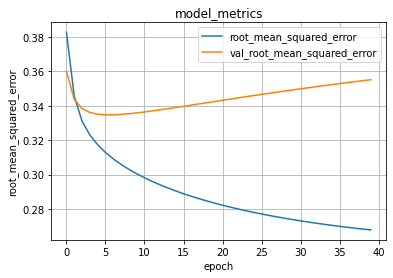

In [46]:
fig = plt.gcf()
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.grid()
plt.title('model_metrics')
plt.ylabel('root_mean_squared_error')
plt.xlabel('epoch')
plt.legend(['root_mean_squared_error', 'val_root_mean_squared_error'])
plt.show()

Dari hasil pelatihan yang dilakukan. Dapat dilihat bahwa nilai metrik *RMSE* berada di sekitar 0.38 untuk *training* dan disekitar 0.36 untuk validasi.